# User Analytics in the Telecommunication Industry

In [1]:
#Importing required packages.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [51]:
teledf=pd.read_excel("../data/Week1_challenge_data_source.xlsx")

In [3]:
teledf.shape

(150001, 55)

In [4]:
teledf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 149010 non-null  float64       
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

In [11]:
teledf.isnull().sum().sort_values(ascending=False)

Nb of sec with 1250B < Vol UL < 6250B     92894
Nb of sec with 6250B < Vol DL < 31250B    88317
TCP DL Retrans. Vol (Bytes)               88146
HTTP UL (Bytes)                           81810
HTTP DL (Bytes)                           81474
Avg RTT DL (ms)                           27829
Avg RTT UL (ms)                           27812
Last Location Name                         1153
MSISDN/Number                              1066
Bearer Id                                   991
Nb of sec with Vol UL < 1250B               793
10 Kbps < UL TP < 50 Kbps (%)               792
UL TP > 300 Kbps (%)                        792
50 Kbps < UL TP < 300 Kbps (%)              792
UL TP < 10 Kbps (%)                         792
Nb of sec with Vol DL < 6250B               755
DL TP < 50 Kbps (%)                         754
50 Kbps < DL TP < 250 Kbps (%)              754
250 Kbps < DL TP < 1 Mbps (%)               754
DL TP > 1 Mbps (%)                          754
Handset Type                            

In [12]:
dropable_columns=[
"Nb of sec with 37500B < Vol UL",
"Nb of sec with 6250B < Vol UL < 37500B",
"Nb of sec with 125000B < Vol DL" ,
"TCP UL Retrans. Vol (Bytes)"
"Nb of sec with 31250B < Vol DL < 125000B",
"Nb of sec with 1250B < Vol UL < 6250B",
"Nb of sec with 6250B < Vol DL < 31250B",
"TCP DL Retrans. Vol (Bytes)",
"HTTP UL (Bytes)",
"HTTP DL (Bytes)"
]
for el in dropable_columns:
    teledf.drop([el], axis=1, inplace=True)


Data Exploration

In [55]:
#number of handset types in the dataframe
teledf["Handset Type"].replace({"":None}, inplace=True)
handsetdf=teledf["Handset Type"].value_counts().nlargest(10)
handsetdf

Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Samsung Galaxy A5 Sm-A520F       3724
Name: Handset Type, dtype: int64

<AxesSubplot:>

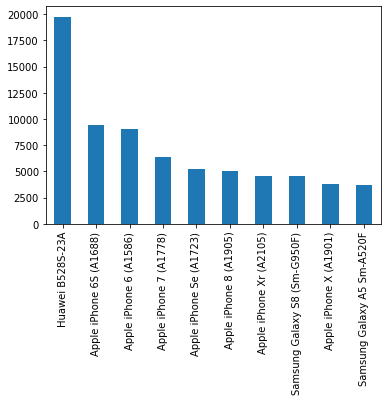

In [56]:

#number of handset types in the dataframe 
handsetdf.plot(kind="bar")


In [62]:
teledf["Handset Manufacturer"].value_counts().nlargest(10)

Apple                                   59565
Samsung                                 40839
Huawei                                  34423
Sony Mobile Communications Ab             980
Wiko Global Sasu                          747
Xiaomi Communications Co Ltd              397
Oneplus Technology (Shenzhen) Co Ltd      342
Asustek                                   285
Lenovo                                    254
Tcl Communication Ltd                     220
Name: Handset Manufacturer, dtype: int64

In [66]:
teledf["Handset Manufacturer"].replace({"undefined":"NaN"}, inplace=True)
teledf["Handset Manufacturer"].dropna(inplace=True)
clean_headset_count=teledf["Handset Manufacturer"].value_counts().nlargest(10)

<AxesSubplot:>

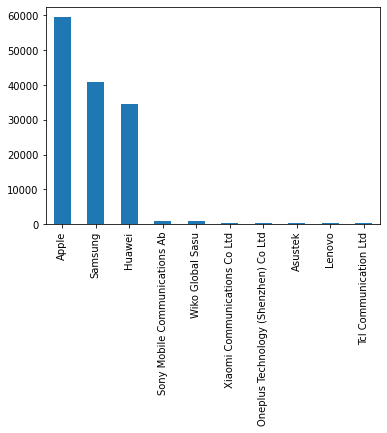

In [67]:
clean_headset_count.plot(kind="bar")